In [1]:
cd ../..

C:\Users\mrefoyo\Documents\Proyectos\Sub-SpaCE_plus


In [2]:
import os
import pickle
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf

from experiments.evaluation.evaluation_utils import load_dataset_for_eval, calculate_metrics_for_dataset

print(tf.__version__)

2.13.0


In [22]:
# datasets = ['CBF', 'chinatown', 'coffee', 'gunpoint', 'ECG200']
DATASETS = ["BasicMotions", "NATOPS", "UWaveGestureLibrary"]
methods = {
    "43b17a2e4f21097540adf8600402c5bd32fa60d6": "subspace_gknn_gch",
    "37a3f06c077321b95960769282152427a7ee48ae": "subspace_gknn_ich", 
    "86df14d56b66fecfb65d5805107dfe10961ecae9": "subspace_iknn_gch",     
    "4f40e39bfe0d3da692b5571d87f7ec915c42eba2": "subspace_iknn_ich", 
}

# Get results

In [23]:
# Data and aux data dict
data_dict = {}
models_dict = {}
outlier_calculators_dict = {}
possible_nuns_dict = {}
desired_classes_dict = {}
original_classes_dict = {}

# Results dicts
mean_results_dict = {}
methods_cfs_dict = {}
results_all_datasets_df = pd.DataFrame()
common_test_indexes_dict = {}

# Iterate through datasets
for dataset in DATASETS:
    print(f'Calculating metrics for {dataset}')
    # Load all info needed to get the counterfactual
    data_tuple, original_classes, model, outlier_calculator, possible_nuns, desired_classes = load_dataset_for_eval(dataset)
    data_dict[dataset] = data_tuple
    models_dict[dataset] = model
    outlier_calculators_dict[dataset] = outlier_calculator
    possible_nuns_dict[dataset] = possible_nuns
    desired_classes_dict[dataset] = desired_classes
    original_classes_dict[dataset] = original_classes

    # Get the metrics for all methods
    dataset_mean_std_df, dataset_results_df, method_cfs_dataset, common_test_indexes = calculate_metrics_for_dataset(
        dataset, methods,
        data_tuple, original_classes, model, outlier_calculator, possible_nuns
    )
    mean_results_dict[dataset] = dataset_mean_std_df
    methods_cfs_dict[dataset] = method_cfs_dataset
    results_all_datasets_df = pd.concat([results_all_datasets_df, dataset_results_df])
    common_test_indexes_dict[dataset] = common_test_indexes

    # Store results
    dataset_mean_std_df.to_csv(f'./experiments/evaluation/results_mean_metrics_{dataset}.csv', sep=";", index=False)

# Store all results
results_all_datasets_df.to_csv(f'./experiments/evaluation/results_all.csv', sep=";", index=False)


Calculating metrics for BasicMotions
37a3f06c077321b95960769282152427a7ee48ae


100%|██████████| 40/40 [00:01<00:00, 20.81it/s]


43b17a2e4f21097540adf8600402c5bd32fa60d6


100%|██████████| 40/40 [00:01<00:00, 20.64it/s]


4f40e39bfe0d3da692b5571d87f7ec915c42eba2


100%|██████████| 40/40 [00:02<00:00, 17.78it/s]


86df14d56b66fecfb65d5805107dfe10961ecae9


100%|██████████| 40/40 [00:01<00:00, 20.48it/s]


Calculating metrics for NATOPS
37a3f06c077321b95960769282152427a7ee48ae


100%|██████████| 100/100 [00:04<00:00, 20.25it/s]


43b17a2e4f21097540adf8600402c5bd32fa60d6


100%|██████████| 100/100 [00:04<00:00, 20.12it/s]


4f40e39bfe0d3da692b5571d87f7ec915c42eba2


100%|██████████| 100/100 [00:04<00:00, 20.81it/s]


86df14d56b66fecfb65d5805107dfe10961ecae9


100%|██████████| 100/100 [00:04<00:00, 20.12it/s]


Calculating metrics for UWaveGestureLibrary
37a3f06c077321b95960769282152427a7ee48ae


100%|██████████| 100/100 [00:04<00:00, 20.38it/s]


43b17a2e4f21097540adf8600402c5bd32fa60d6


100%|██████████| 100/100 [00:05<00:00, 19.63it/s]


4f40e39bfe0d3da692b5571d87f7ec915c42eba2


100%|██████████| 100/100 [00:04<00:00, 20.65it/s]


86df14d56b66fecfb65d5805107dfe10961ecae9


100%|██████████| 100/100 [00:04<00:00, 20.85it/s]


In [24]:
from IPython.display import display
for dataset in DATASETS:
    print(dataset)
    display(mean_results_dict[dataset])

BasicMotions


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times
0,subspace_gknn_ich,19.5 ± 11.69,297.55 ± 125.15,0.5 ± 0.21,1008.71 ± 877.75,78.5 ± 55.48,0.83 ± 0.07,1.0 ± 0.0,1.0 ± 0.0,0.27 ± 0.14,0.02 ± 0.03,36.02 ± 8.08,0.12 ± 0.03,26.12 ± 6.73
1,subspace_gknn_gch,19.5 ± 11.69,263.75 ± 112.04,0.44 ± 0.19,888.72 ± 767.68,73.72 ± 52.34,0.76 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.25 ± 0.14,0.01 ± 0.02,15.6 ± 5.57,0.05 ± 0.02,24.85 ± 5.69
2,subspace_iknn_ich,19.5 ± 11.69,293.9 ± 133.4,0.49 ± 0.22,983.07 ± 855.95,77.2 ± 54.86,0.81 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.27 ± 0.16,0.02 ± 0.03,35.7 ± 9.05,0.12 ± 0.03,26.43 ± 7.23
3,subspace_iknn_gch,19.5 ± 11.69,269.4 ± 126.89,0.45 ± 0.21,887.4 ± 751.58,73.72 ± 52.13,0.75 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.25 ± 0.15,0.01 ± 0.02,16.65 ± 7.98,0.06 ± 0.03,24.41 ± 6.23


NATOPS


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times
0,subspace_gknn_ich,87.18 ± 53.72,391.9 ± 185.1,0.32 ± 0.15,163.95 ± 135.51,10.44 ± 6.6,0.94 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.65 ± 0.23,0.16 ± 0.13,89.94 ± 31.76,0.15 ± 0.05,31.5 ± 8.96
1,subspace_gknn_gch,87.18 ± 53.72,354.96 ± 169.96,0.29 ± 0.14,174.99 ± 145.37,10.98 ± 7.14,0.91 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.55 ± 0.16,0.06 ± 0.06,24.96 ± 4.73,0.04 ± 0.01,27.41 ± 6.02
2,subspace_iknn_ich,87.18 ± 53.72,483.69 ± 249.78,0.4 ± 0.2,144.17 ± 122.17,8.73 ± 5.62,0.86 ± 0.13,0.97 ± 0.17,0.8 ± 0.4,0.68 ± 0.26,0.06 ± 0.07,102.8 ± 37.22,0.17 ± 0.06,39.95 ± 17.26
3,subspace_iknn_gch,87.18 ± 53.72,380.87 ± 201.03,0.31 ± 0.16,139.86 ± 121.08,8.97 ± 5.81,0.78 ± 0.16,0.92 ± 0.27,0.8 ± 0.4,0.65 ± 0.23,0.03 ± 0.05,30.52 ± 15.95,0.05 ± 0.03,36.63 ± 16.02


UWaveGestureLibrary


,method,ii,nchanges,sparsity,L1,L2,proba,valid,nuns_valid,outlier_score,increase_outlier_score,subsequences,subsequences %,times
0,subspace_gknn_ich,159.0 ± 87.23,352.03 ± 160.18,0.37 ± 0.17,306.93 ± 141.5,19.73 ± 5.52,0.88 ± 0.08,1.0 ± 0.0,1.0 ± 0.0,0.77 ± 0.15,0.18 ± 0.12,26.86 ± 13.68,0.06 ± 0.03,51.16 ± 12.43
1,subspace_gknn_gch,159.0 ± 87.23,319.92 ± 144.18,0.34 ± 0.15,282.67 ± 131.58,18.95 ± 5.43,0.86 ± 0.09,1.0 ± 0.0,1.0 ± 0.0,0.67 ± 0.12,0.09 ± 0.08,10.89 ± 5.39,0.02 ± 0.01,49.53 ± 11.39
2,subspace_iknn_ich,159.0 ± 87.23,391.72 ± 197.32,0.41 ± 0.21,287.14 ± 145.68,17.46 ± 5.76,0.81 ± 0.12,0.83 ± 0.38,0.81 ± 0.39,0.76 ± 0.16,0.11 ± 0.09,29.33 ± 13.77,0.06 ± 0.03,67.08 ± 29.18
3,subspace_iknn_gch,159.0 ± 87.23,367.16 ± 196.56,0.39 ± 0.21,275.2 ± 147.25,17.14 ± 5.78,0.76 ± 0.15,0.83 ± 0.38,0.81 ± 0.39,0.68 ± 0.12,0.04 ± 0.04,12.14 ± 5.7,0.03 ± 0.01,66.33 ± 27.79


In [7]:
columns = ["nchanges", "L2", "valid", "increase_outlier_score", "subsequences", "times"]
for dataset in DATASETS:
    print(dataset)
    display(mean_results_dict[dataset].set_index("method").sort_index()[columns])

BasicMotions


,nchanges,L2,valid,increase_outlier_score,subsequences,times
method,,,,,,
subspace_gknn_gch,263.75 ± 112.04,73.72 ± 52.34,1.0 ± 0.0,0.01 ± 0.02,15.6 ± 5.57,32.28 ± 7.33
subspace_gknn_ich,297.55 ± 125.15,78.5 ± 55.48,1.0 ± 0.0,0.02 ± 0.03,36.02 ± 8.08,36.73 ± 9.24
subspace_iknn_gch,269.4 ± 126.89,73.72 ± 52.13,1.0 ± 0.0,0.01 ± 0.02,16.65 ± 7.98,33.64 ± 8.59
subspace_iknn_ich,293.9 ± 133.4,77.2 ± 54.86,1.0 ± 0.0,0.02 ± 0.03,35.7 ± 9.05,34.7 ± 9.43


NATOPS


,nchanges,L2,valid,increase_outlier_score,subsequences,times
method,,,,,,
subspace_gknn_gch,354.96 ± 169.96,10.98 ± 7.14,1.0 ± 0.0,0.06 ± 0.06,24.96 ± 4.73,35.51 ± 8.86
subspace_gknn_ich,391.9 ± 185.1,10.44 ± 6.6,1.0 ± 0.0,0.16 ± 0.13,89.94 ± 31.76,44.37 ± 12.07
subspace_iknn_gch,380.87 ± 201.03,8.97 ± 5.81,0.92 ± 0.27,0.03 ± 0.05,30.52 ± 15.95,45.15 ± 19.67
subspace_iknn_ich,483.69 ± 249.78,8.73 ± 5.62,0.97 ± 0.17,0.06 ± 0.07,102.8 ± 37.22,49.13 ± 20.5


UWaveGestureLibrary


,nchanges,L2,valid,increase_outlier_score,subsequences,times
method,,,,,,
subspace_gknn_gch,319.92 ± 144.18,18.95 ± 5.43,1.0 ± 0.0,0.09 ± 0.08,10.89 ± 5.39,60.34 ± 14.24
subspace_gknn_ich,352.03 ± 160.18,19.73 ± 5.52,1.0 ± 0.0,0.18 ± 0.12,26.86 ± 13.68,62.5 ± 17.84
subspace_iknn_gch,367.16 ± 196.56,17.14 ± 5.78,0.83 ± 0.38,0.04 ± 0.04,12.14 ± 5.7,76.43 ± 31.76
subspace_iknn_ich,391.72 ± 197.32,17.46 ± 5.76,0.83 ± 0.38,0.11 ± 0.09,29.33 ± 13.77,75.7 ± 33.03


# Counterfactual visualization

In [8]:
import math
def plot_comp_cfs(x_orig, possible_nuns, x_cfs_dict):
    
    # Calculate auxiliary variables
    method_names = list(x_cfs_dict.keys())
    x_cfs = list(x_cfs_dict.values())
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # Define outer grid
    fig = plt.figure(figsize=(18, 12))
    grid_columns = 2
    grid_rows = math.ceil(len(x_cfs) / grid_columns)
    outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0.1, hspace=0.3)

    # Iterate through outer grid plots
    for m, outer in enumerate(outer_grid):
        try:
            # Get change mask 
            x_cf = x_cfs[m]
            method_name = method_names[m]
            # Get nuns used by the method depending on the name
            if "gknn" in method_name:
                nun_example = possible_nuns["gknn"]
            elif "iknn" in method_name:
                nun_example = possible_nuns["iknn"]
            else:
                raise ValueError('Not detected NUN finding procedure in name. Method name must contain "gknn" or "iknn"')
            found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
            diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
        except IndexError:
            break
    
        # Create inner grid
        inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0.2, hspace=0.2, subplot_spec=outer)
        sub_channel_axs = []
        for i in range(n_channels):
            ax = plt.Subplot(fig, inner_grid[i])
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
            ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
            ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
            # Set title if first channel
            if i == 0:
                ax.set_title(method_name)
            
            # Add fill to changes
            starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
            ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
            # Iterate over the mask segments and fill them with red color
            for i in range(0, len(starts)):
                start_idx = starts[i]
                end_idx = ends[i]
                # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
                ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
            
            # Add ax to list of subplots
            fig.add_subplot(ax)
            sub_channel_axs.append(ax)

    # Plot figure
    fig.legend(
        sub_channel_axs,     # The line objects
        labels=['NUN', 'x_cf', 'x_orig'],   # The labels for each line
        loc='center',
        prop={'size': 12}
    )
    plt.show()



In [20]:
dataset = "UWaveGestureLibrary"
# methods = ["subspace_grouped", "subspace_v2_grouped", "subspace_individual", "subspace_v2_individual"]
common_index_instance = 14

Sample 54: true class [1], x_orig predicted 1, desired_class  6


C:\Users\mrefoyo\AppData\Local\Temp\ipykernel_15676\2187854086.py:61: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(


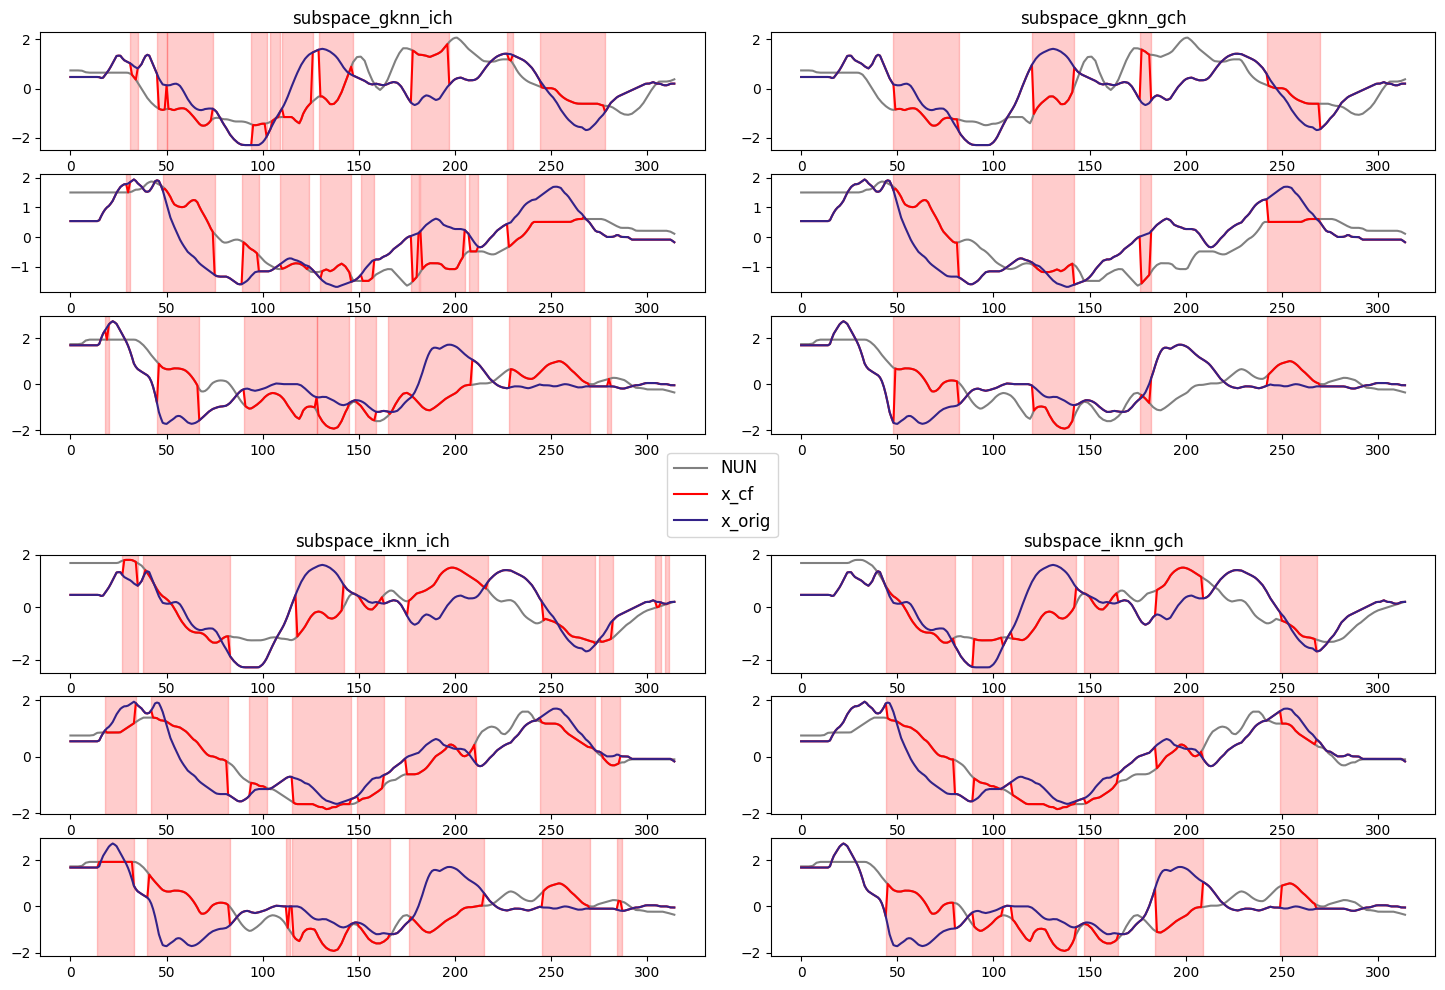

In [21]:
# Get data
X_train, y_train, X_test, y_test = data_dict[dataset]
common_indexes = common_test_indexes_dict[dataset]
instance_index = common_indexes[common_index_instance]

# Get common cfs calculated for all method
x_orig = X_test[instance_index]

# Get possible NUNs
possible_nuns = possible_nuns_dict[dataset]
possible_nuns_instance = {type: possible_nuns[type][instance_index] for type in ["gknn", "iknn"]}

# Get original class and desired class
original_class = original_classes_dict[dataset][instance_index]
desired_class = desired_classes_dict[dataset][instance_index]

# Get the cf calculated for all methods
sol_cfs_methods = methods_cfs_dict[dataset]
sol_cfs_methods = {method: sol_cfs[common_index_instance]['cf'] for method, sol_cfs in sol_cfs_methods.items()}

# Show result
print(f'Sample {instance_index}: true class {y_test[instance_index]}, x_orig predicted {original_class}, desired_class  {desired_class}')
plot_comp_cfs(x_orig, possible_nuns_instance, sol_cfs_methods)


In [ ]:
# Create plot with examples of each method in each dataset

In [ ]:
# CBF: 1, 2, 10, 18, 19
# chinatown: 3, 7, 19
# coffee: 1, 3, 9, 16
# ECG200: 0, 13
# gunpoint: 9, 10, 15 (pesimos en general)
dataset_samples = [('CBF', 2), ('chinatown', 19), ('coffee', 3), ('ECG200', 13), ('gunpoint', 15)]
methods_trad_dict = {"wcf_ng": "W-CF", "ng": "NG", "ab_cf": "AB-CF", "subspace": "Sub-SpaCE"}
methods = list(methods_trad_dict.keys())
include_nun_list = [False, False, False, False]

In [ ]:
from collections import OrderedDict

# Define outer grid
fig = plt.figure(figsize=(16, 6))
grid_rows = len(methods)
grid_columns = len(dataset_samples)
outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0, hspace=0)

# Iterate through outer grid plots
for i_outer, outer in enumerate(outer_grid):
    i_dataset = i_outer % grid_columns
    dataset, instance = dataset_samples[i_dataset]
    column_title = f'{dataset} instance {instance}'
    
    X_train, y_train, X_test, y_test = data_dict[dataset]
    nuns_idx = nuns_idx_dict[dataset]
    sol_cfs_methods = sol_cfs_dict[dataset]
    sol_cfs_methods = {method: sol_cfs_methods[method][instance]['cf'] for method in methods}

    # Calculate auxiliary variables
    method_names = list(sol_cfs_methods.keys())
    x_cfs = list(sol_cfs_methods.values())
    x_orig = X_test[instance]
    nun_example = X_train[nuns_idx[instance]]
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # get method m
    m = i_outer // grid_columns
    try:
        # Get change mask 
        x_cf = x_cfs[m]
        method_name = method_names[m]
        found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
        diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
    except IndexError:
        break

    # Create inner grid
    inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0, hspace=0, subplot_spec=outer)
    sub_channel_axs = []
    for i in range(n_channels):
        ax = plt.Subplot(fig, inner_grid[i])
        if include_nun_list[m]:
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
        ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
        ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
        # ax.axis("off")
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add fill to changes
        starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
        ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
        # Iterate over the mask segments and fill them with red color
        for i in range(0, len(starts)):
            start_idx = starts[i]
            end_idx = ends[i]
            # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
            ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
        
        # Set column titles
        if m == 0:
            ax.set_title(column_title)
        if i_dataset == 0:
            ax.set_ylabel(methods_trad_dict[method_name], size='large')
        # Add ax to list of subplots
        fig.add_subplot(ax)
        sub_channel_axs.append(ax)

# Plot figure
plt.tight_layout()
"""fig.legend(
    sub_channel_axs,     # The line objects
    labels=['$x^n$', 'x', "x'"],   # The labels for each line
    loc='lower center',
    # loc='center right',
    prop={'size': 14},
    ncol=3
)"""
# plt.show()
# plt.savefig('./experiments/results/examples_cfs.png', dpi=300)


In [ ]:
from collections import OrderedDict

# Define outer grid
fig = plt.figure(figsize=(12, 12))
grid_rows = len(dataset_samples)
grid_columns = len(methods)
outer_grid = gridspec.GridSpec(grid_rows, grid_columns, wspace=0, hspace=0)

# Iterate through outer grid plots
for i_outer, outer in enumerate(outer_grid):
    i_dataset = i_outer // grid_columns
    dataset, instance = dataset_samples[i_dataset]
    
    X_train, y_train, X_test, y_test = data_dict[dataset]
    nuns_idx = nuns_idx_dict[dataset]
    sol_cfs_methods = sol_cfs_dict[dataset]
    sol_cfs_methods = {method: sol_cfs_methods[method][instance]['cf'] for method in methods}

    # Calculate auxiliary variables
    method_names = list(sol_cfs_methods.keys())
    x_cfs = list(sol_cfs_methods.values())
    x_orig = X_test[instance]
    nun_example = X_train[nuns_idx[instance]]
    length = x_orig.shape[0]
    n_channels = x_orig.shape[1]

    # get method m
    m = i_outer % grid_columns
    try:
        # Get change mask 
        x_cf = x_cfs[m]
        method_name = method_names[m]
        found_counterfactual_mask = (x_orig != x_cf.reshape(1, length, n_channels)).astype(int)
        diff_mask = np.diff(found_counterfactual_mask, prepend=0, append=0, axis=1)
    except IndexError:
        break
    
    # Create inner grid
    inner_grid = gridspec.GridSpecFromSubplotSpec(n_channels, 1, wspace=0, hspace=0, subplot_spec=outer)
    sub_channel_axs = []
    for i in range(n_channels):
        ax = plt.Subplot(fig, inner_grid[i])
        if include_nun_list[m]:
            ax.plot(nun_example.reshape(1, length, n_channels)[:, :, i].flatten(), color='grey')
        ax.plot(x_cf.reshape(1, length, n_channels)[:, :, i].flatten(), color='red')
        ax.plot(x_orig.reshape(1, length, n_channels)[:, :, i].flatten(), color="#332288")
        # ax.axis("off")
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Add fill to changes
        starts = np.clip( np.where(diff_mask[0, :, i].flatten() == 1)[0] - 1 , 0, length)
        ends = np.where(diff_mask[0, :, i].flatten() == -1)[0]
        # Iterate over the mask segments and fill them with red color
        for i in range(0, len(starts)):
            start_idx = starts[i]
            end_idx = ends[i]
            # plt.fill_between(comp_df.iloc[start_idx:end_idx].index, comp_df.min(), comp_df.max(), color='red', alpha=0.7)
            ax.axvspan(start_idx, end_idx, alpha=0.2, color='red')
        
        # Set column titles
        column_title = methods_trad_dict[method_name]
        # row_title = f'{dataset} \n instance {instance}'
        row_title = f'{dataset} [{instance}]'
        if m == 0:
            ax.set_ylabel(row_title, fontsize=16, rotation=90)
        if i_dataset == 0:
            ax.set_title(column_title, fontsize=18)
            
        # Add ax to list of subplots
        fig.add_subplot(ax)
        sub_channel_axs.append(ax)

# Plot figure
plt.tight_layout()
"""fig.legend(
    sub_channel_axs,     # The line objects
    labels=['$x^n$', 'x', "x'"],   # The labels for each line
    # loc='lower center',
    loc='center right',
    prop={'size': 18},
    ncol=1
)"""
# plt.show()
plt.savefig('./experiments/results/examples_cfs.png', dpi=300)
